# Strategy exploration of MAgents-Battlefield on different topologies
## Marc Vicuna, 101214652
## Implementation used for tests.

## Step-by-step training
We first go through the algorithm step-by-step, with commented code to allow an understanding of what is being done.
We initialize the environment, train the model and visualize the results.

In [2]:
#Imports
#from pettingzoo.magent import battlefield_v3
import battlefield_vicuna
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import supersuit as ss

## Initialization

In [3]:
# Parallel version, death is possibly dangerous.
policy_name = "policy_test"
#Initial environment
env = battlefield_vicuna.parallel_env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.2,
max_cycles=2000, wall=5, noise=0, extra_features=False)
env.reset()
#Stacking frames for movement #FRAMES ARE STACKED
env = ss.frame_stack_v1(env, 2)
# Handling the death of agents for vectorization
env = ss.black_death_v2(env)
#Vectorize the environment
env = ss.pettingzoo_env_to_vec_env_v1(env)
##vectorize_aec_env_v0(aec_env, num_envs, num_cpus=0)
#Start parallel training. n cpus, 2n environments.
env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class='stable_baselines3')

## Training
### May take minutes or hours depending on the task.

In [8]:
# Training.
model = PPO(MlpPolicy, env, verbose=3, gamma=0.95, n_steps=1024, ent_coef=0.0905168, learning_rate=0.00062211, vf_coef=0.042202, max_grad_norm=0.9, gae_lambda=0.99, n_epochs=10, clip_range=0.3, batch_size=256)
model.learn(total_timesteps=2000000)
model.save(policy_name)

Using cpu device
------------------------------
| time/              |       |
|    fps             | 17035 |
|    iterations      | 1     |
|    time_elapsed    | 3     |
|    total_timesteps | 65536 |
------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 6777       |
|    iterations           | 2          |
|    time_elapsed         | 19         |
|    total_timesteps      | 131072     |
| train/                  |            |
|    approx_kl            | 0.03749514 |
|    clip_fraction        | 0.316      |
|    clip_range           | 0.3        |
|    entropy_loss         | -3.01      |
|    explained_variance   | -1.29      |
|    learning_rate        | 0.000622   |
|    loss                 | -0.316     |
|    n_updates            | 5          |
|    policy_gradient_loss | -0.0526    |
|    value_loss           | 0.0284     |
----------------------------------------
----------------------------

----------------------------------------
| time/                   |            |
|    fps                  | 4661       |
|    iterations           | 13         |
|    time_elapsed         | 182        |
|    total_timesteps      | 851968     |
| train/                  |            |
|    approx_kl            | 0.08537251 |
|    clip_fraction        | 0.165      |
|    clip_range           | 0.3        |
|    entropy_loss         | -2.78      |
|    explained_variance   | 0.00543    |
|    learning_rate        | 0.000622   |
|    loss                 | -0.101     |
|    n_updates            | 60         |
|    policy_gradient_loss | -0.0128    |
|    value_loss           | 17.6       |
----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4627        |
|    iterations           | 14          |
|    time_elapsed         | 198         |
|    total_timesteps      | 917504      |
| train/  

-----------------------------------------
| time/                   |             |
|    fps                  | 4478        |
|    iterations           | 24          |
|    time_elapsed         | 351         |
|    total_timesteps      | 1572864     |
| train/                  |             |
|    approx_kl            | 0.014876618 |
|    clip_fraction        | 0.0734      |
|    clip_range           | 0.3         |
|    entropy_loss         | -2.97       |
|    explained_variance   | 0.0712      |
|    learning_rate        | 0.000622    |
|    loss                 | -0.267      |
|    n_updates            | 115         |
|    policy_gradient_loss | -0.0227     |
|    value_loss           | 6.48        |
-----------------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4475        |
|    iterations           | 25          |
|    time_elapsed         | 366         |
|    total_timesteps      | 163840

## Visualization of training
### Reinstantiation

In [4]:
# View our results
# Reinstantiate.
env = battlefield_vicuna.env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.2,
max_cycles=500, extra_features=False)
env = ss.frame_stack_v1(env, 2)
# Load policy
model = PPO.load(policy_name)

## Gif generation

In [ ]:
from array2gif import write_gif
import numpy as np
gif_name = policy_name + ".gif"
# Load policy
model = PPO.load(policy_name)
env = ss.frame_stack_v1(env, 2)
env.reset()
images=[]
i = 0
for agent in env.agent_iter():
    obs, reward, done, info = env.last()
    act = model.predict(obs, deterministic=True)[0] if not done else None
    env.step(act)
    i+=1
    if i==100:
        images.append(env.render(mode='rgb_array'))
        i=0
images = [i.transpose(1,0,2) for i in images]
write_gif(images[:100], gif_name, fps=5)

## All-in-one
This cell contains all code explained above, to avoid having to run every cell each time. Moreover, it reloads the battlefield module each time, allowing modifications to environment between iterations.

In [1]:
import battlefield_vicuna
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import supersuit as ss
from array2gif import write_gif
import numpy as np
import imp
imp.reload(battlefield_vicuna)
# Parallel version, death is possibly dangerous.
policy_name = "mediumpass9.2"
#Initial environment
env = battlefield_vicuna.parallel_env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.1,
max_cycles=2000, extra_features=False)
env.reset()
#Stacking frames for movement #FRAMES ARE STACKED
env = ss.frame_stack_v1(env, 2)
# Handling the death of agents for vectorization
env = ss.black_death_v2(env)
#Vectorize the environment
env = ss.pettingzoo_env_to_vec_env_v1(env)
##vectorize_aec_env_v0(aec_env, num_envs, num_cpus=0)
#Start parallel training. n cpus, 2n environments.
env = ss.concat_vec_envs_v1(env, 8, num_cpus=4, base_class='stable_baselines3')
# Training
model = PPO(MlpPolicy, env, verbose=3, gamma=0.95, n_steps=256, ent_coef=0.0905168, learning_rate=0.00062211, vf_coef=0.042202, max_grad_norm=0.9, gae_lambda=0.99, n_epochs=10, clip_range=0.3, batch_size=256)
model.learn(total_timesteps=2000000)
model.save(policy_name)
# View our results
# Reinstantiate.
env = battlefield_vicuna.env(map_size=46, minimap_mode=False, step_reward=-0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=1,
max_cycles=500, extra_features=False)
gif_name = policy_name + ".gif"
# Load policy
model = PPO.load(policy_name)
env = ss.frame_stack_v1(env, 2)
env.reset()
images=[]
i = 0

for agent in env.agent_iter():
    obs, reward, done, info = env.last()
    act = model.predict(obs, deterministic=True)[0] if not done else None
    env.step(act)
    i+=1
    if i==100:
        images.append(env.render(mode='rgb_array'))
        i=0
images = [i.transpose(1,0,2) for i in images]
write_gif(images[:150], gif_name, fps=5)

Using cpu device
-------------------------------
| time/              |        |
|    fps             | 18566  |
|    iterations      | 1      |
|    time_elapsed    | 7      |
|    total_timesteps | 131072 |
-------------------------------
-----------------------------------------
| time/                   |             |
|    fps                  | 4318        |
|    iterations           | 2           |
|    time_elapsed         | 60          |
|    total_timesteps      | 262144      |
| train/                  |             |
|    approx_kl            | 0.038323525 |
|    clip_fraction        | 0.293       |
|    clip_range           | 0.3         |
|    entropy_loss         | -3.01       |
|    explained_variance   | -2.27       |
|    learning_rate        | 0.000622    |
|    loss                 | -0.337      |
|    n_updates            | 10          |
|    policy_gradient_loss | -0.0453     |
|    value_loss           | 0.0313      |
-----------------------------------------
---

-----------------------------------------
| time/                   |             |
|    fps                  | 2619        |
|    iterations           | 13          |
|    time_elapsed         | 650         |
|    total_timesteps      | 1703936     |
| train/                  |             |
|    approx_kl            | 0.048032254 |
|    clip_fraction        | 0.239       |
|    clip_range           | 0.3         |
|    entropy_loss         | -2.4        |
|    explained_variance   | -0.0259     |
|    learning_rate        | 0.000622    |
|    loss                 | -0.286      |
|    n_updates            | 120         |
|    policy_gradient_loss | -0.0553     |
|    value_loss           | 0.000334    |
-----------------------------------------
----------------------------------------
| time/                   |            |
|    fps                  | 2601       |
|    iterations           | 14         |
|    time_elapsed         | 705        |
|    total_timesteps      | 1835008    

## Debugging
For purposes of vizualization, here is useful code to render the environment.

### Image rendering

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


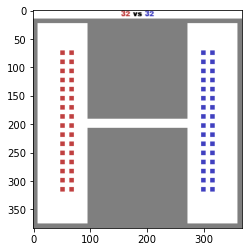

In [1]:
import battlefield_vicuna
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import supersuit as ss
from matplotlib import pyplot as plt
env = battlefield_vicuna.parallel_env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.2,
max_cycles=100, extra_features=False)
env.reset();
# Visualisation commands
# Image
image = env.render(mode='rgb_array')
plt.imshow(image)
plt.show()

### Pygame rendering

In [ ]:
import battlefield_vicuna
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import supersuit as ss
env = battlefield_vicuna.env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.2,
max_cycles=500, wall=5, noise=0, extra_features=False)
env = ss.frame_stack_v1(env, 2)
# Load policy
model = PPO.load("policytest")
env.reset()
for agent in env.agent_iter():
    obs, reward, done, info = env.last()
    act = model.predict(obs, deterministic=True)[0] if not done else None
    env.step(act)
    env.render()

pygame 2.0.0 (SDL 2.0.12, python 3.8.5)
Hello from the pygame community. https://www.pygame.org/contribute.html


### Gif rendering

In [3]:
import battlefield_vicuna
from stable_baselines3.ppo import MlpPolicy
from stable_baselines3 import PPO
import supersuit as ss
from array2gif import write_gif
import numpy as np
env = battlefield_vicuna.env(map_size=46, minimap_mode=False, step_reward=0.005,
dead_penalty=-0.1, attack_penalty=-0.1, attack_opponent_reward=0.2,
max_cycles=500, wall=1, noise=0, extra_features=False)
env = ss.frame_stack_v1(env, 2)
# Load policy
model = PPO.load("policytest")
env.reset()
images=[]
i = 0
for agent in env.agent_iter():
    obs, reward, done, info = env.last()
    act = model.predict(obs, deterministic=True)[0] if not done else None
    env.step(act)
    i+=1
    if i==100:
        images.append(env.render(mode='rgb_array'))
        i=0
images = [i.transpose(1,0,2) for i in images]
write_gif(images[:100], 'new1.gif', fps=5)

TypeError: parallel_env() got multiple values for argument 'wall'

# Formations
### For the battlefield_vicuna.py

## Army formations
These are code parts of the battlefield_(...).py that represents the implementation of the Battlefield environment. More specifically, here is the position of all agents.

## Military formations, 32 agents per team

In [ ]:
middle = 23
# left
pos = []
for x in range(6, 9, 2):
    for y in range(middle-8*2,middle+8*2, 2):
        pos.append([x, y, 0])
# right
pos = []
for x in range(2*middle-9, 2*middle-6, 2):
    for y in range(middle-8*2,middle+8*2, 2):
        pos.append([x, y, 0])

## Wall Formations
These are code parts of the battlefield_(...).py that represents the implementation of the Battlefield environment. More specifically, here is the position of all inner walls.
### Torus

In [3]:
pos = []
wall = self.wall
for y in range(middle-wall-1,middle+wall+1):
    for x in range(middle-wall-1,middle+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))

[(21, 21),
 (22, 21),
 (23, 21),
 (24, 21),
 (21, 22),
 (22, 22),
 (23, 22),
 (24, 22),
 (21, 23),
 (22, 23),
 (23, 23),
 (24, 23),
 (21, 24),
 (22, 24),
 (23, 24),
 (24, 24)]

### 2-torus

In [ ]:
pos = []
wall = self.wall
off = 10
for y in range(middle-wall-1+off,middle+wall+1+off):
    for x in range(middle-wall-1,middle+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))
for y in range(middle-wall-1-off,middle+wall+1-off):
    for x in range(middle-wall-1,middle+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))

### Separation 2 clusters

In [ ]:
pos = []
wall = self.wall # 9 or 10
off = 12
for y in range(middle-wall-1+off,middle+wall+1+off):
    for x in range(middle-wall-1,middle+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))
for y in range(middle-wall-1-off,middle+wall+1-off):
    for x in range(middle-wall-1,middle+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))

### No wall

In [ ]:
pos = []

### Seperation 3 clusters

In [ ]:
pos = []
wall = self.wall # 9 or 10
for y in range(0,20):
    for x in range(15-wall-1,15+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))
for y in range(26,46):
    for x in range(15-wall-1,15+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))
for y in range(0,20):
    for x in range(30-wall-1,30+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))
for y in range(26,46):
    for x in range(30-wall-1,30+wall+1):
        if random.random() >= self.noise:
            pos.append((x, y))